## Iterative Closet Point 

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 100

module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from kaizen.map.grid import PixelGrid
from kaizen.map.ict import SpatialICT
from kaizen.utils.gis import read_data_frame
from kaizen.utils.gis import convert_and_get_extent
from shapely.geometry import LineString

### Initialize the grid for the area on which ict is to performed
the bounding box of the area can be extracted from [this](https://boundingbox.klokantech.com/) website and export it in json format

The bounding box can be of a city, or a smaller region, what ever the extent, it should occupy all the traces and obstacle to run

In [2]:
grid = PixelGrid.pixel_grid(
    resolution=1,
    grid_bounds=convert_and_get_extent(
        [
            [
                [2.13242075, 42.84341088],
                [2.23118924, 42.84341088],
                [2.23118924, 42.90975515],
                [2.13242075, 42.90975515],
                [2.13242075, 42.84341088],
            ]
        ],
        crs_to="epsg:26910",
    ),
)

### Initialize Spatial ICT

In [3]:
ict = SpatialICT(grid=grid)

### ICT


In [4]:
source = read_data_frame(r"D:\Cypherics\Library\kaizen\data\ict_test_complex.shp")
target = read_data_frame(r"D:\Cypherics\Library\kaizen\data\please_work_osm_complex_1.shp")

transformed_source = ict.ict_map_matched_target_form_data_frame(
    source=source,
    target=target,

)

### Visulaize

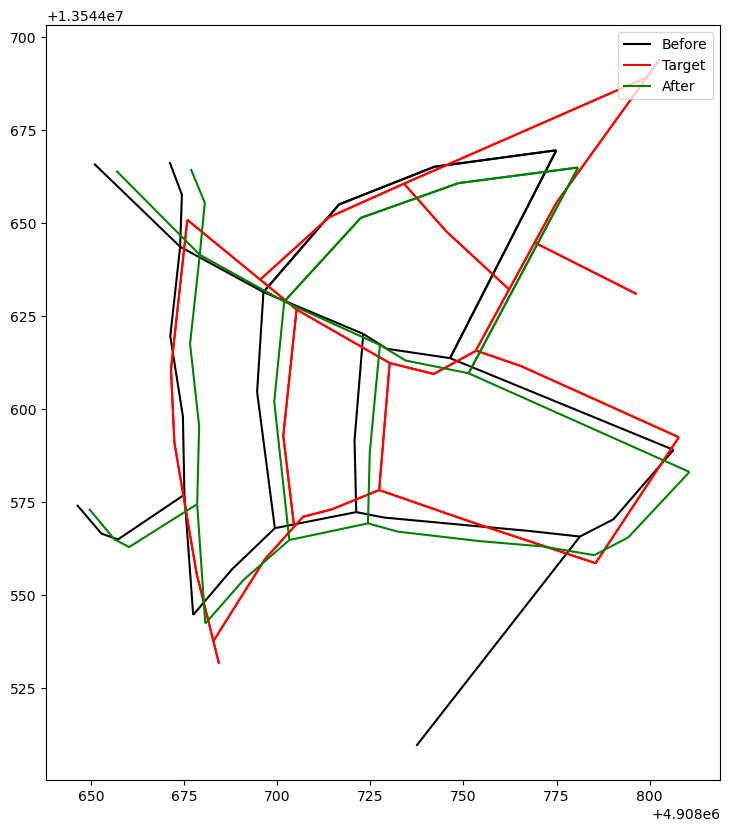

In [5]:
transformed_source_data_frame = gpd.GeoDataFrame([LineString(sub_element) for sub_element in transformed_source],
    columns=['LineString'], 
    geometry='LineString')

f, ax = plt.subplots(1)
source.plot(ax=ax, color="black", label='Before')
target.plot(ax=ax,cmap=None, color="red", label='Target')

transformed_source_data_frame.plot(ax=ax, cmap=None, color="green", label='After')

plt.legend()
plt.show()